In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVR
from sklearn.model_selection import validation_curve

## Setup data

In [38]:
fires = pd.read_csv("./forestfires.csv")

FEATURE_NAMES = [
    "temp",
    "RH",
    "wind",
    "rain"
]

X, y = fires[FEATURE_NAMES], np.log(fires["area"]+1)

## Gamma Parameter Tuning

In [55]:
param_range = np.linspace(0, 2, num=1000)

In [57]:
train_scores, test_scores = validation_curve(
    SVR(),
    X, y,
    param_name="gamma",
    param_range=param_range,
    cv=10,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
)

In [58]:
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = -np.std(train_scores, axis=1)

test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = -np.std(test_scores, axis=1)

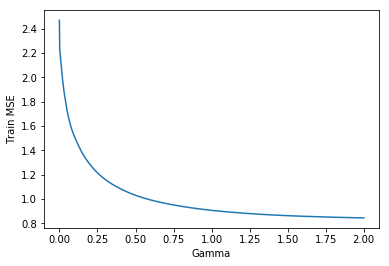

In [59]:

plt.xlabel("Gamma")
plt.ylabel("Train MSE")
plt.plot(param_range, train_scores_mean);

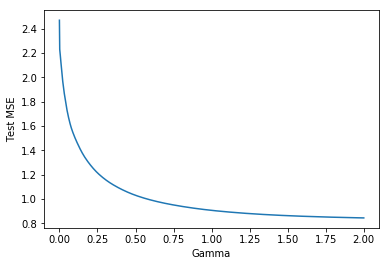

In [60]:

plt.xlabel("Gamma")
plt.ylabel("Test MSE")
plt.plot(param_range, train_scores_mean);